In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel(r'C:\Users\samue\OneDrive\Desktop\Group_Project_Data_SFD_Data_Toronto_Police.xlsx', sheet_name='Shooting_and_Firearm_Discharges')

In [105]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [107]:
# Assess the significance of the missing location data
nsa_by_year = df[df["HOOD_140"]=="NSA"][["OCC_YEAR","HOOD_140"]].groupby(["OCC_YEAR"], as_index=False).count()
full_by_year = df[["OCC_YEAR","HOOD_140"]].groupby(["OCC_YEAR"], as_index=False).count()
df_merged = pd.merge(nsa_by_year, full_by_year, on="OCC_YEAR", how="right")
df_merged["Missing_percent"] = df_merged["HOOD_140_x"] / df_merged["HOOD_140_y"]

df_merged

,OCC_YEAR,HOOD_140_x,HOOD_140_y,Missing_percent
0,2004,8.0,191,0.041885
1,2005,11.0,262,0.041985
2,2006,7.0,215,0.032558
3,2007,5.0,207,0.024155
4,2008,3.0,238,0.012605
5,2009,5.0,252,0.019841
6,2010,8.0,259,0.030888
7,2011,4.0,227,0.017621
8,2012,4.0,219,0.018265
9,2013,9.0,204,0.044118


In [108]:
row_to_drop = df[df["HOOD_140"]=="NSA"].index

df.drop(row_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5641 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5641 non-null   float64
 1   Y                  5641 non-null   float64
 2   OBJECTID           5641 non-null   int64  
 3   EVENT_UNIQUE_ID    5641 non-null   object 
 4   OCC_DATE           5641 non-null   object 
 5   OCC_YEAR           5641 non-null   int64  
 6   OCC_MONTH          5641 non-null   object 
 7   OCC_DOW            5641 non-null   object 
 8   OCC_DOY            5641 non-null   int64  
 9   OCC_DAY            5641 non-null   int64  
 10  OCC_HOUR           5641 non-null   int64  
 11  OCC_TIME_RANGE     5641 non-null   object 
 12  DIVISION           5641 non-null   object 
 13  DEATH              5641 non-null   int64  
 14  INJURIES           5641 non-null   int64  
 15  HOOD_158           5641 non-null   object 
 16  NEIGHBOURHOOD_158  5641 non-n

In [109]:
df["Medical_need"] = df["DEATH"] + df["INJURIES"]

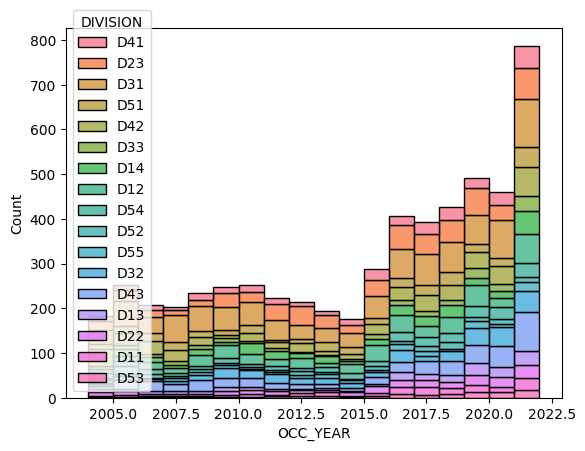

In [110]:
df_year_end = df[["OBJECTID", "OCC_YEAR", "DIVISION"]]
sns.histplot(data=df_year_end, x="OCC_YEAR", binwidth=1, hue="DIVISION", multiple="stack")
plt.show()

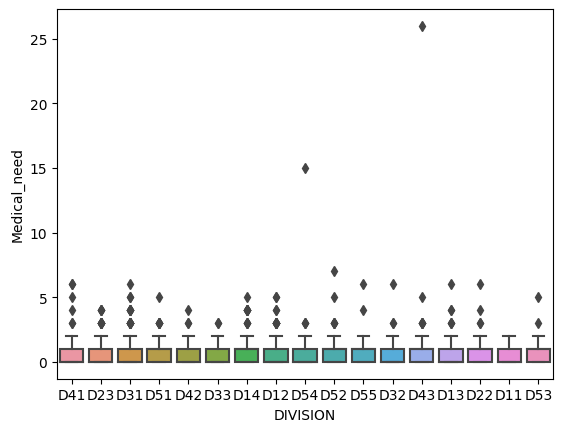

In [111]:
df_division = df[["DIVISION","EVENT_UNIQUE_ID","Medical_need"]]
sns.boxplot(data=df_division, x ="DIVISION", y="Medical_need")
plt.show()

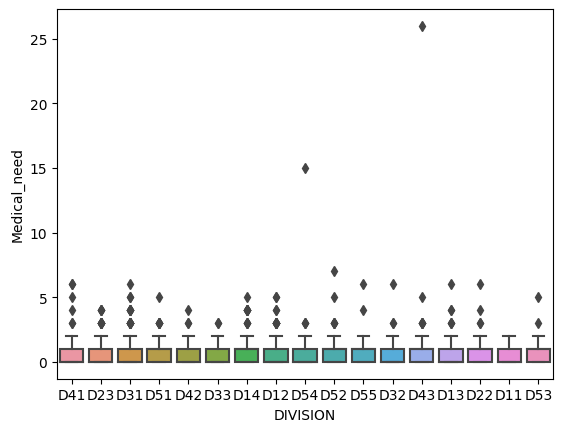

In [112]:
df_division = df[["DIVISION","EVENT_UNIQUE_ID","Medical_need"]]
sns.boxplot(data=df_division, x ="DIVISION", y="Medical_need")
plt.show()

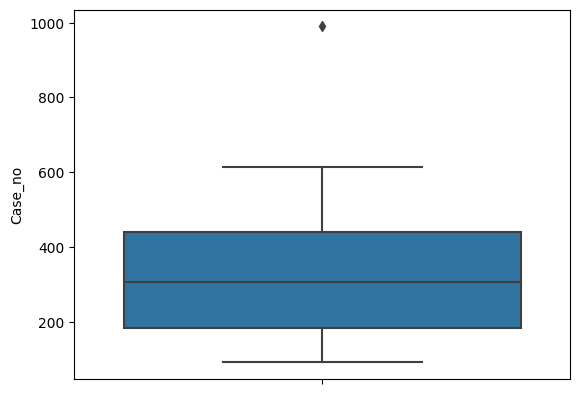

In [113]:
df_division_grouped = df_division.groupby(["DIVISION"], as_index=False).agg(Medical_need=("Medical_need","sum"), Case_no=("EVENT_UNIQUE_ID","count"))
sns.boxplot(data=df_division_grouped, y="Case_no")
plt.show()

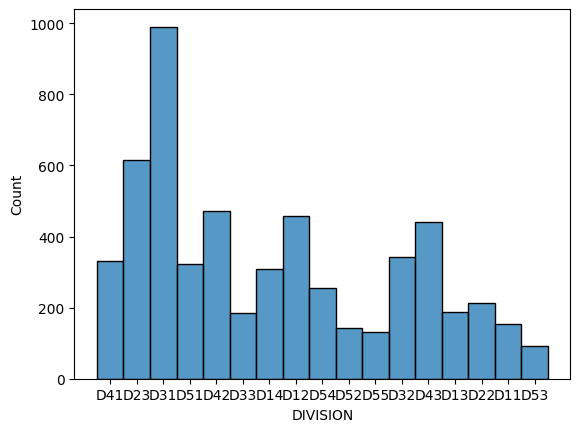

In [114]:
sns.histplot(data=df_division, x="DIVISION")
plt.show()

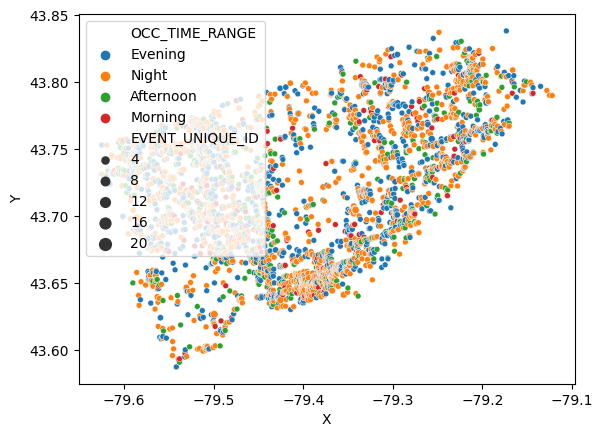

In [115]:
df_scatter = df[["X","EVENT_UNIQUE_ID","Y","OCC_TIME_RANGE"]]
df_scatter_grouped = df_scatter.groupby(["X","Y","OCC_TIME_RANGE"], as_index=False).count()
sns.scatterplot(data=df_scatter_grouped, x ="X", y="Y", hue="OCC_TIME_RANGE", size=df_scatter_grouped["EVENT_UNIQUE_ID"])
plt.legend(loc='upper left')
plt.show()

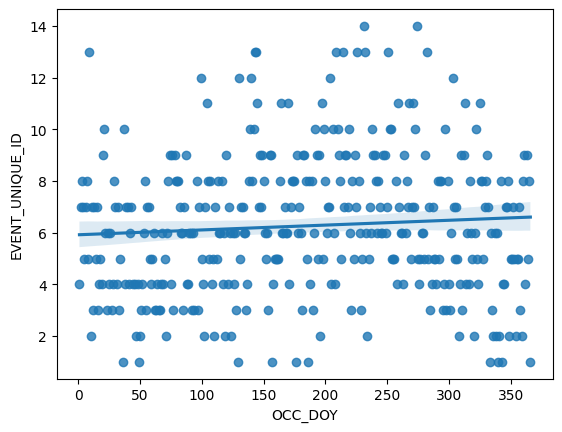

In [116]:
df_scatter2 = df[df["OCC_TIME_RANGE"]=="Evening"][["EVENT_UNIQUE_ID","OCC_DOY"]]
df_scatter2_grouped = df_scatter2.groupby(["OCC_DOY"], as_index=False).count()
sns.regplot(data=df_scatter2_grouped, x ="OCC_DOY", y="EVENT_UNIQUE_ID")
plt.show()

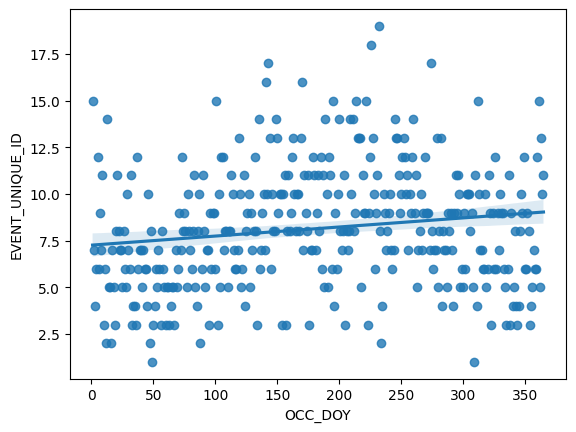

In [117]:
df_scatter2 = df[df["DIVISION"].isin(["D31","D23","D42","D12","D43"])][["EVENT_UNIQUE_ID","OCC_DOY"]]
df_scatter2_grouped = df_scatter2.groupby(["OCC_DOY"], as_index=False).count()
sns.regplot(data=df_scatter2_grouped, x ="OCC_DOY", y="EVENT_UNIQUE_ID")
plt.show()

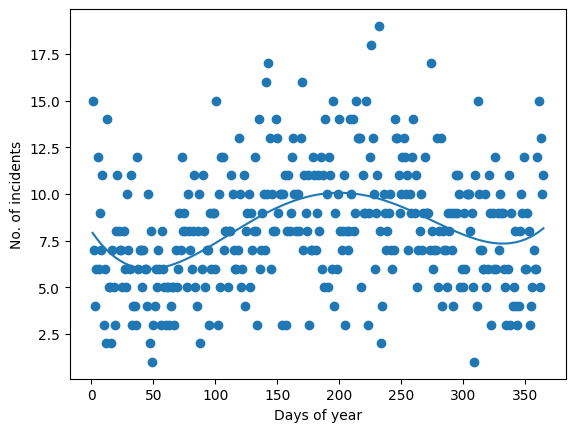

In [118]:
mymodel = np.poly1d(np.polyfit(df_scatter2_grouped["OCC_DOY"],df_scatter2_grouped["EVENT_UNIQUE_ID"], 4))
myline = np.linspace(1, 365, 100)

plt.scatter(df_scatter2_grouped["OCC_DOY"],df_scatter2_grouped["EVENT_UNIQUE_ID"])
plt.plot(myline, mymodel(myline))
plt.xlabel("Days of year")
plt.ylabel("No. of incidents")
plt.show()

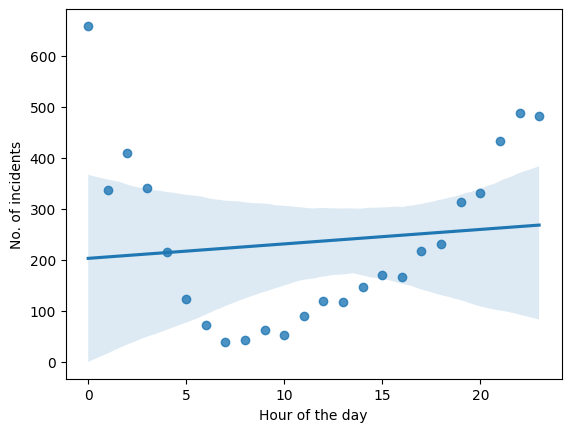

In [119]:
df_scatter2 = df[["EVENT_UNIQUE_ID","OCC_HOUR"]]
df_scatter2_grouped = df_scatter2.groupby(["OCC_HOUR"], as_index=False).count()
sns.regplot(data=df_scatter2_grouped, x ="OCC_HOUR", y="EVENT_UNIQUE_ID")
plt.xlabel("Hour of the day")
plt.ylabel("No. of incidents")
plt.show()

In [120]:
df_case = df[["EVENT_UNIQUE_ID", "OCC_HOUR", "NEIGHBOURHOOD_158"]]
df_case_grouped = df_case.groupby(["OCC_HOUR", "NEIGHBOURHOOD_158"], as_index=False).count()
df_case_grouped



,OCC_HOUR,NEIGHBOURHOOD_158,EVENT_UNIQUE_ID
0,0,Agincourt North,1
1,0,Agincourt South-Malvern West,3
2,0,Annex,3
3,0,Avondale,1
4,0,Banbury-Don Mills,2
...,...,...,...
1940,23,Woburn North,3
1941,23,Wychwood,3
1942,23,Yonge-Bay Corridor,5
1943,23,York University Heights,12


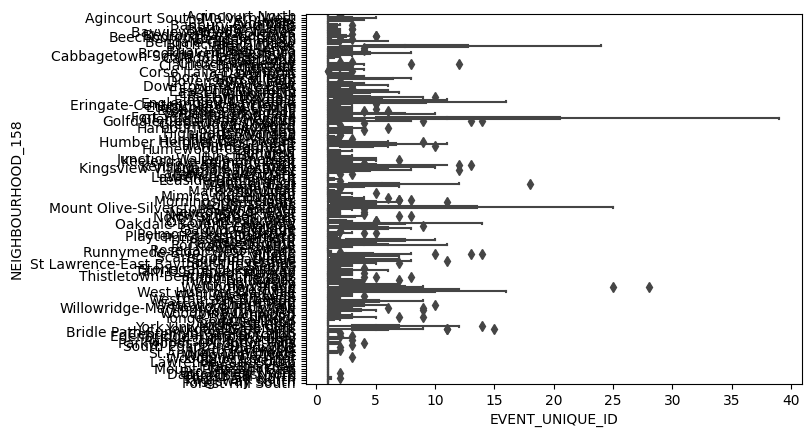

In [121]:
sns.boxplot(data=df_case_grouped, y="NEIGHBOURHOOD_158", x="EVENT_UNIQUE_ID")
plt.show()

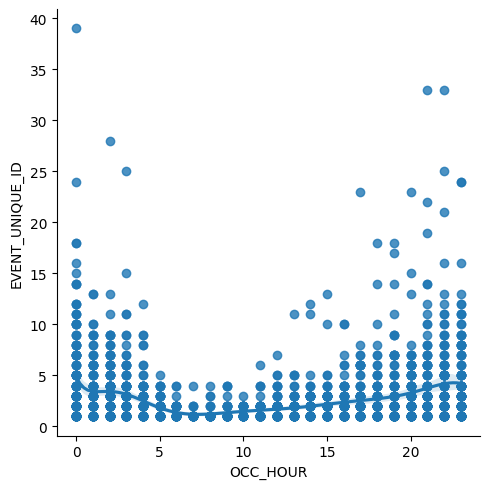

In [122]:
sns.lmplot(data=df_case_grouped, x = "OCC_HOUR", y = "EVENT_UNIQUE_ID", order=10)
plt.show()

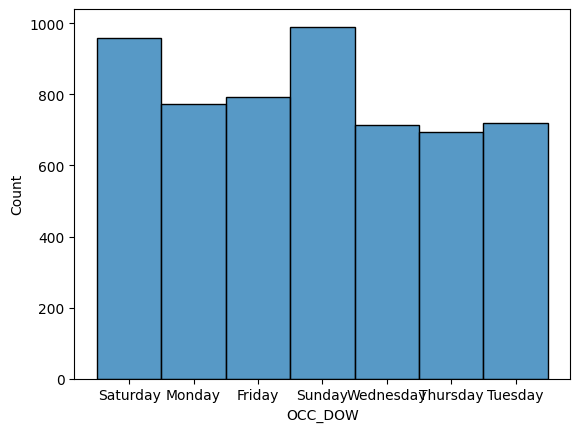

In [123]:
df_case = df[["EVENT_UNIQUE_ID", "OCC_DOW"]]
df_case_grouped = df_case.groupby(["OCC_DOW"], as_index=False).count()
sns.histplot(data=df_case, x="OCC_DOW")
plt.show()

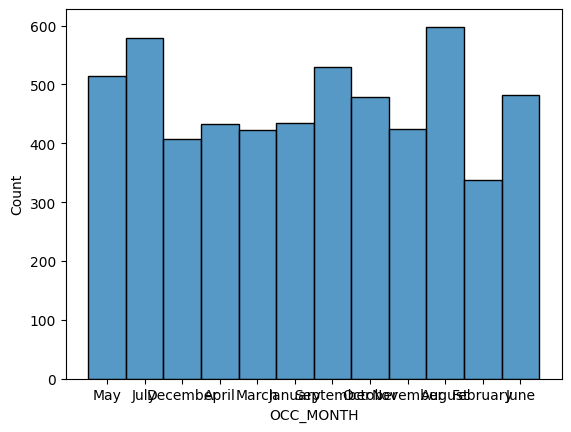

In [124]:
df_case = df[["EVENT_UNIQUE_ID", "OCC_MONTH"]]
df_case_grouped = df_case.groupby(["OCC_MONTH"], as_index=False).count()
sns.histplot(data=df_case, x="OCC_MONTH")
plt.show()

In [146]:
# transform the the day of week into numerical
#map_day = {"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5, "Saturday":6, "Sunday":7}
#df["OCC_DOW"] = df["OCC_DOW"].map(map_day)

#map_range = {"Morning":"1_Morning","Afternoon":"2_Afternoon","Evening":"3_Evening","Night":"4_Night"}
#df["OCC_TIME_RANGE"] = df["OCC_TIME_RANGE"].map(map_range)

# create a new dataframe based on variables identified and count of incident
df_case = df[["EVENT_UNIQUE_ID", "OCC_MONTH", "OCC_DOW", "OCC_TIME_RANGE", "NEIGHBOURHOOD_158"]]
df_case_grouped = df_case.groupby(["OCC_MONTH", "OCC_DOW", "OCC_TIME_RANGE", "NEIGHBOURHOOD_158"],as_index=False).count()

df_case_grouped

# classify the neighborhood based on quartile
#neighborhood = df_case_grouped.groupby("NEIGHBOURHOOD_158")["EVENT_UNIQUE_ID"].sum().to_frame().reset_index()
#neighborhood["neighborhood_group"] = pd.qcut(neighborhood["EVENT_UNIQUE_ID"], q=4, labels=["low","medium","high","very high"])

# merge the neighborhood into the new dataframe
#df_case_grouped = df_case_grouped.merge(neighborhood[["NEIGHBOURHOOD_158","neighborhood_group"]], on="NEIGHBOURHOOD_158", how='left')
#df_case_grouped

,OCC_MONTH,OCC_DOW,OCC_TIME_RANGE,NEIGHBOURHOOD_158,EVENT_UNIQUE_ID


In [ ]:
df_case_grouped_month = df_case_grouped.groupby(["OCC_MONTH","neighborhood_group"], as_index=False).sum()
sns.lineplot(data=df_case_grouped_month, x="OCC_MONTH", y="EVENT_UNIQUE_ID", hue="neighborhood_group")
plt.show()

In [ ]:
df_case_grouped_month = df_case_grouped.groupby(["OCC_DOW","neighborhood_group"], as_index=False).sum()
sns.lineplot(data=df_case_grouped_month, x="OCC_DOW", y="EVENT_UNIQUE_ID", hue="neighborhood_group")
plt.show()

In [ ]:
df_case_grouped_month = df_case_grouped.groupby(["OCC_TIME_RANGE","neighborhood_group"], as_index=False).sum()
sns.lineplot(data=df_case_grouped_month, x="OCC_TIME_RANGE", y="EVENT_UNIQUE_ID", hue="neighborhood_group")
plt.show()